In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.datasets import mnist
from matplotlib import pyplot as plt
from keras.layers import Dense,Flatten
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization 
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, classification_report
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []
        self.loss = []
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))
        self.loss.append(logs.get('loss'))
        X_val, y_val = self.validation_data[0], self.validation_data[1]
        y_predict = np.asarray(model.predict(X_val))
        y_val = np.argmax(y_val, axis=1)
        y_predict = np.argmax(y_predict, axis=1)
        self.val_recalls.append(recall_score(y_val, y_predict, average=None))
        self.val_precisions.append(precision_score(y_val, y_predict, average=None))
        self.val_f1s.append(f1_score(y_val,y_predict, average=None))

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# print(X_train.shape)
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0],28, 28,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0],28, 28,1).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# # one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(y_train.shape)
num_classes = y_test.shape[1]
print(num_classes)

input_shape=(28,28,1)
epochs=15
batch_size = 512
history = AccuracyHistory()


(60000, 10)
10


In [3]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(7, 7), strides=(1, 1),activation='relu',input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

print(model.summary())
# history.get_data()
model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,validation_split=0.05,callbacks=[history])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
y_pred = model.predict_classes(X_test)
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 22, 22, 32)        1600      
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              3965952   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 3,977,930
Trainable params: 3,977,866
Non-trainable para

In [4]:
from keras.models import load_model

model.save('init_model_MNIST.h5')  # creates a HDF5 file 'my_model.h5'

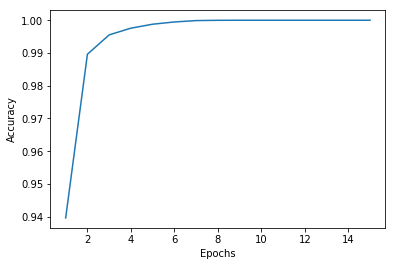

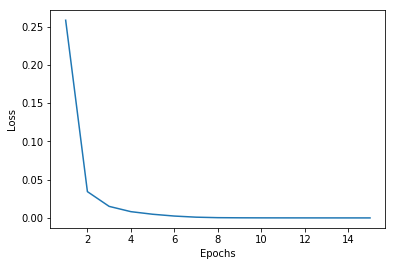

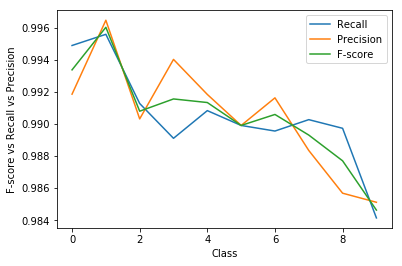

In [5]:
fscore=f1_score(np.argmax(y_test,axis=1), y_pred,average=None)
recall=recall_score(np.argmax(y_test,axis=1), y_pred,average=None)
prec=precision_score(np.argmax(y_test,axis=1), y_pred,average=None)
plt.plot(range(1,epochs+1), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()
plt.plot(range(1,epochs+1), history.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
plt.plot(recall,label='Recall')
plt.plot(prec,label='Precision')
plt.xlabel('Class')
plt.ylabel('F-score vs Recall vs Precision')
plt.plot(fscore,label='F-score')
plt.legend()

In [7]:
avg_fscore=np.mean(fscore)
print(avg_fscore)

0.990526456382969


In [8]:
avg_precision=np.mean(prec)
print(avg_precision)

0.9905224422678078


In [9]:
avg_recall=np.mean(recall)
print(avg_recall)

0.9905335733237738


In [10]:
cnf_mat = confusion_matrix(np.argmax(y_test,axis=1), y_pred)

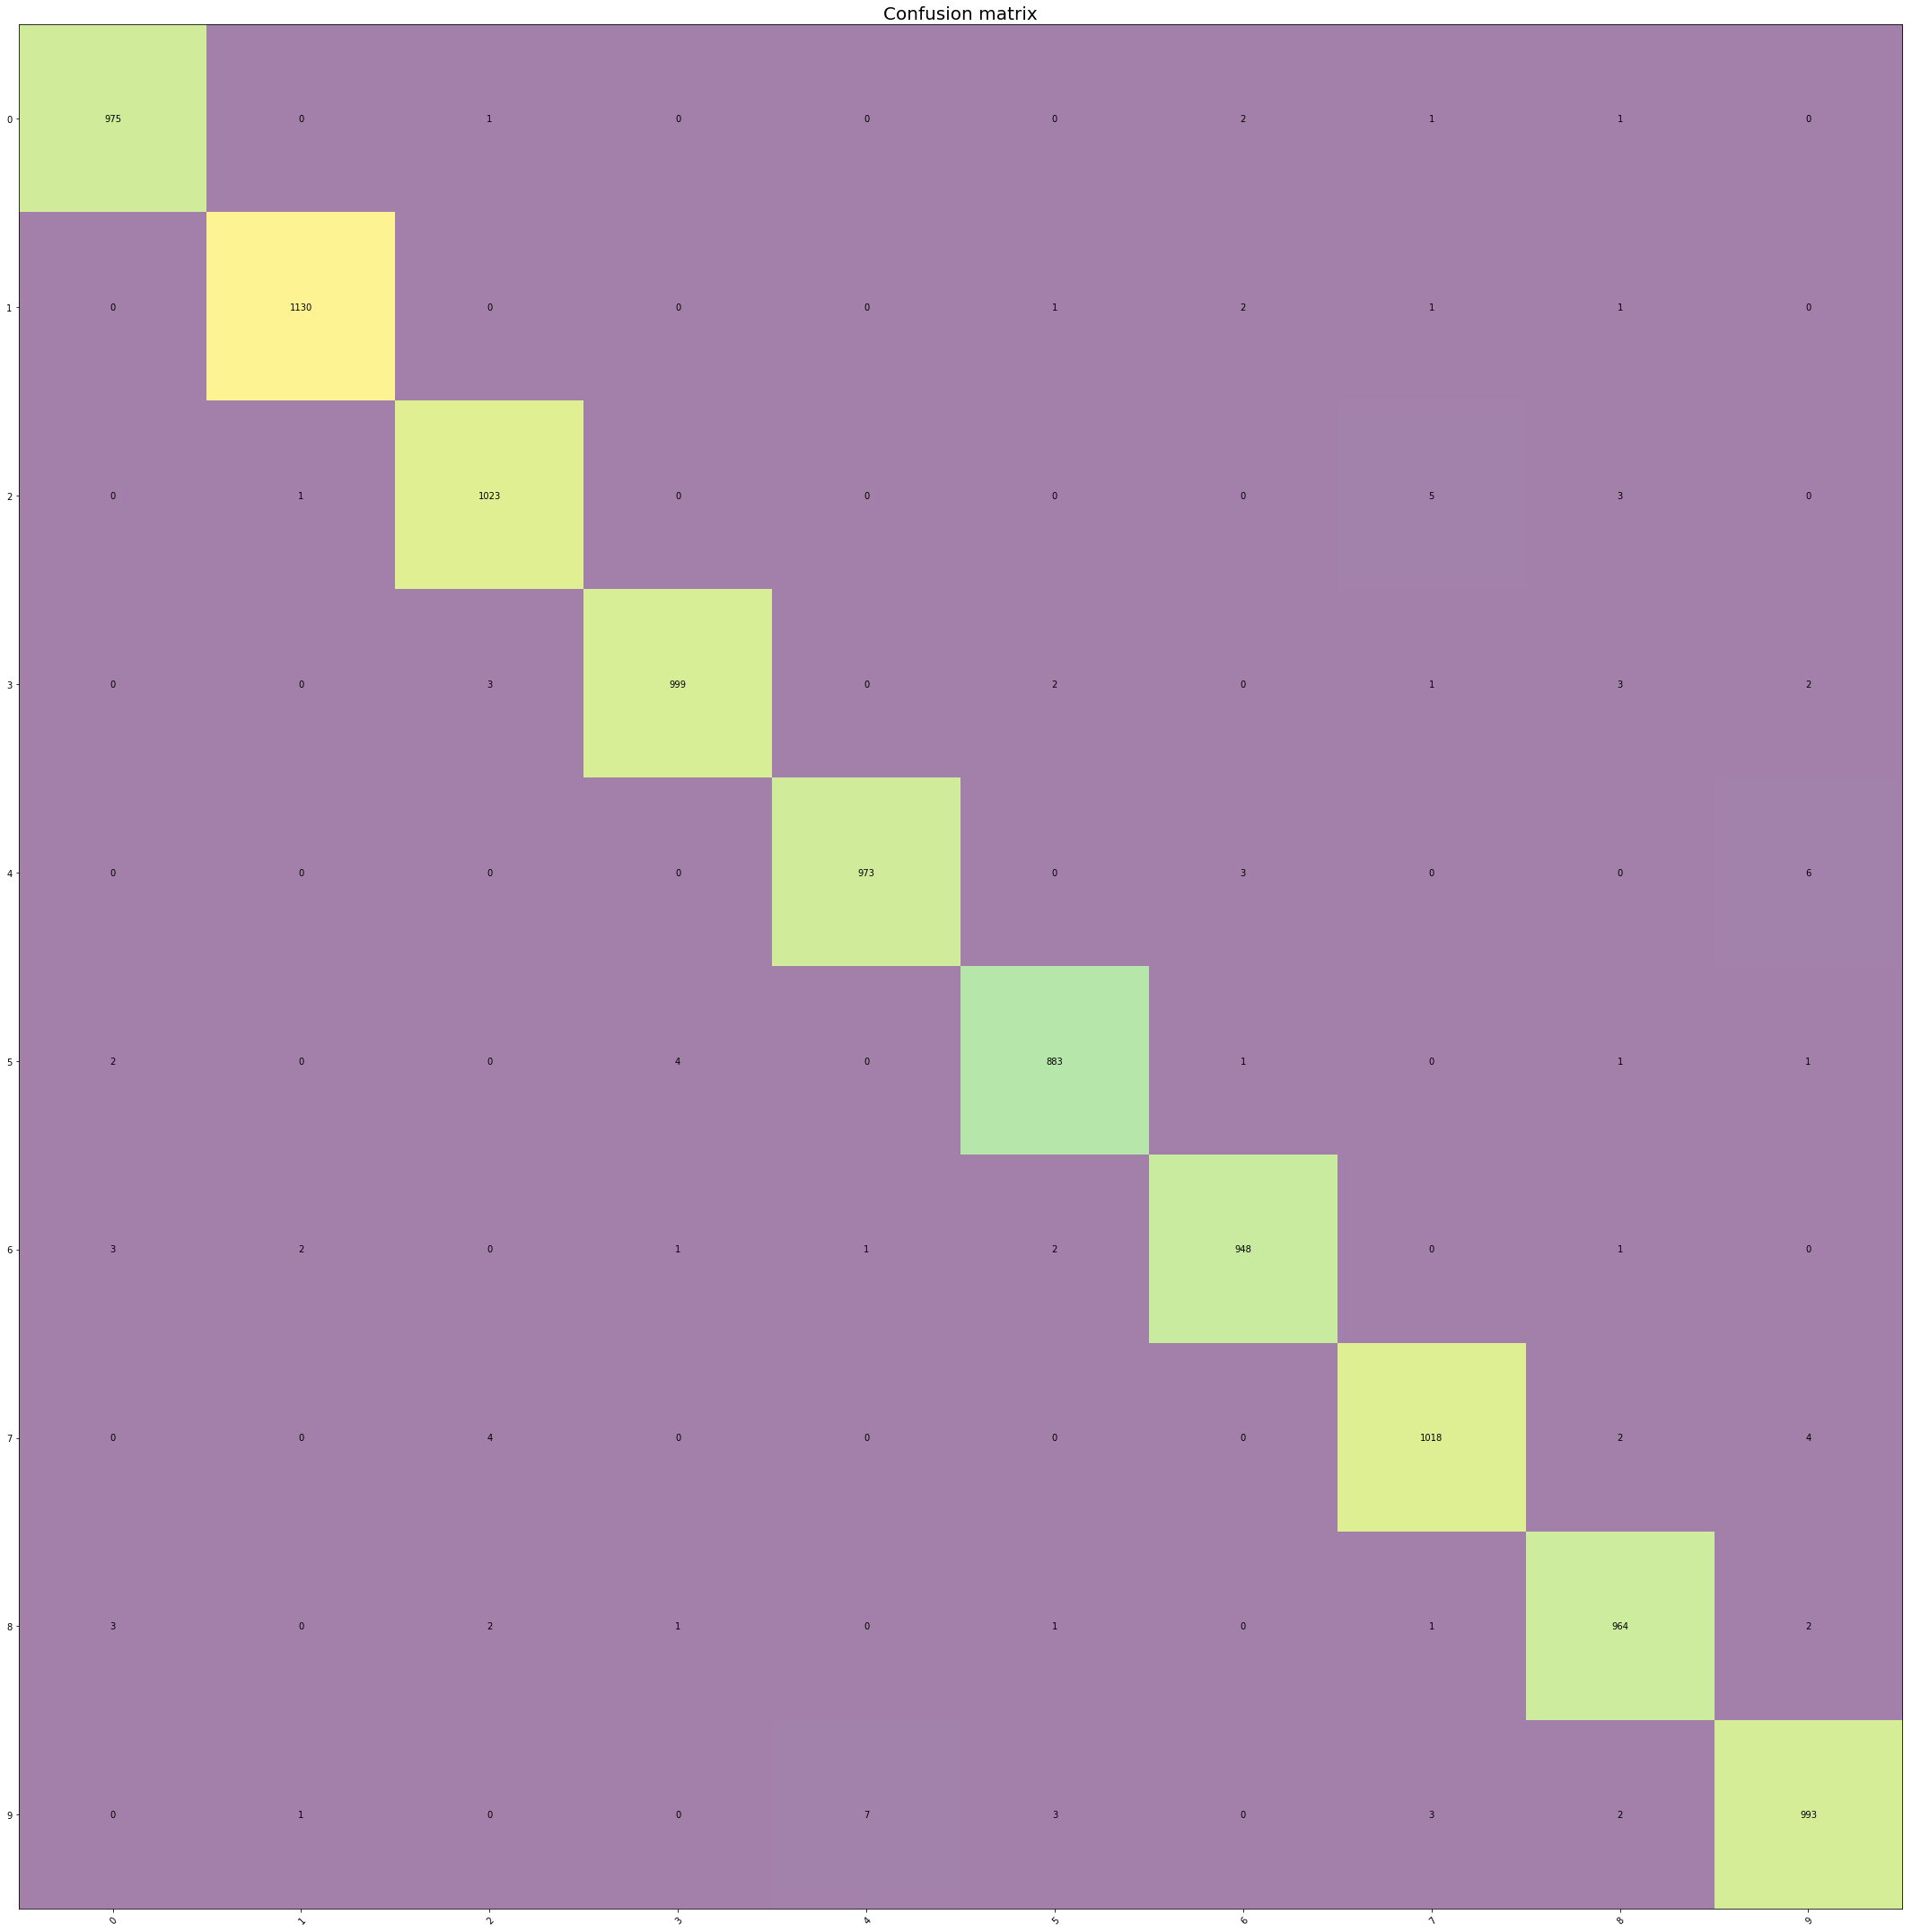

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


conf = cnf_mat


fig, ax = plt.subplots(figsize=(30,30))
im = ax.imshow(conf,alpha=0.5)
# plt.show()

# We want to show all ticks...
ax.set_xticks(np.arange(cnf_mat.shape[0]))
ax.set_yticks(np.arange(cnf_mat.shape[1]))
# ... and label them with the respective list entries
ax.set_xticklabels(np.arange(0,96))
ax.set_yticklabels(np.arange(0,96))

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(cnf_mat.shape[0]):
    for j in range(cnf_mat.shape[1]):
        text = ax.text(j, i, conf[i, j],
                       ha="center", va="center",color="black",fontsize=10)
ax.set_title("Confusion matrix",fontsize=20)
fig.tight_layout()

fig.savefig('plot1_cnf.png')
plt.show()


In [12]:
del model